# Pheochromocytoma and Paraganglioma

To solve the question: "What's the relationship between the RET and Pheochromocytoma and Paraganglioma when considering the influence of age?"

# 1. Data Preprocessing

In [3]:
import pandas as pd
import numpy as np
clinical_data = pd.read_csv(r'C:\Users\张宇强\Desktop\TCGA.PCPG.sampleMap_PCPG_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv(r'C:\Users\张宇强\Desktop\HiSeqV2_PANCAN', sep='\t', index_col=0)

In [4]:
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,bcr_sample_barcode,ct_scan,...,_GENOMIC_ID_TCGA_PCPG_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_PCPG_PDMRNAseqCNV,_GENOMIC_ID_TCGA_PCPG_miRNA_HiSeq,_GENOMIC_ID_data/public/TCGA/PCPG/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_PCPG_mutation_bcgsc_gene,_GENOMIC_ID_TCGA_PCPG_RPPA,_GENOMIC_ID_TCGA_PCPG_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_PCPG_gistic2,_GENOMIC_ID_TCGA_PCPG_PDMRNAseq,_GENOMIC_ID_TCGA_PCPG_exp_HiSeqV2_percentile
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-P7-A5NX-01,TCGA-P7-A5NX-01,TCGA-P7-A5NX,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,78,TCGA-P7-A5NX-F62809,TCGA-P7-A5NX,TCGA-P7-A5NX-01A,YES,...,2dc9f559-fbfd-4290-82d2-e65bc3d8c0e4,NaN,TCGA-P7-A5NX-01,TCGA-P7-A5NX-01,TCGA-P7-A5NX-01A-11D-A35D-08,BF79A366-BA96-4CA3-B44C-50D267EF389E,TCGA-P7-A5NX-01A-11D-A35D-08,NaN,TCGA-P7-A5NX-01,2dc9f559-fbfd-4290-82d2-e65bc3d8c0e4
TCGA-P7-A5NY-01,TCGA-P7-A5NY-01,TCGA-P7-A5NY,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,21,TCGA-P7-A5NY-F62808,TCGA-P7-A5NY,NaN,YES,...,f9d224fb-5f3b-4261-8625-29c117b0b56c,TCGA-P7-A5NY-01,TCGA-P7-A5NY-01,TCGA-P7-A5NY-01,TCGA-P7-A5NY-01A-12D-A35D-08,NaN,TCGA-P7-A5NY-01A-12D-A35D-08,TCGA-P7-A5NY-01A-12D-A35C-01,TCGA-P7-A5NY-01,f9d224fb-5f3b-4261-8625-29c117b0b56c
TCGA-P7-A5NY-05,TCGA-P7-A5NY-05,TCGA-P7-A5NY,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,21,TCGA-P7-A5NY-F62808,TCGA-P7-A5NY,TCGA-P7-A5NY-05A,YES,...,08f40bb8-22b9-4fe3-be97-6041aafe35e7,NaN,TCGA-P7-A5NY-05,TCGA-P7-A5NY-05,TCGA-P7-A5NY-05A-11D-A35D-08,NaN,TCGA-P7-A5NY-05A-11D-A35D-08,NaN,NaN,08f40bb8-22b9-4fe3-be97-6041aafe35e7
TCGA-P8-A5KC-01,TCGA-P8-A5KC-01,TCGA-P8-A5KC,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,48,TCGA-P8-A5KC-F69550,TCGA-P8-A5KC,TCGA-P8-A5KC-01A,NaN,...,f8c789c9-629e-4a36-9cbf-2e52ecabe74c,TCGA-P8-A5KC-01,TCGA-P8-A5KC-01,TCGA-P8-A5KC-01,TCGA-P8-A5KC-01A-11D-A35D-08,A3F29179-7C6D-4A8A-A549-661F5283FFEB,TCGA-P8-A5KC-01A-11D-A35D-08,TCGA-P8-A5KC-01A-11D-A35C-01,TCGA-P8-A5KC-01,f8c789c9-629e-4a36-9cbf-2e52ecabe74c
TCGA-P8-A5KC-11,TCGA-P8-A5KC-11,TCGA-P8-A5KC,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,48,TCGA-P8-A5KC-F69550,TCGA-P8-A5KC,NaN,NaN,...,d0c544ce-2fab-4111-8351-8595a0089b31,NaN,TCGA-P8-A5KC-11,TCGA-P8-A5KC-11,NaN,NaN,NaN,NaN,NaN,d0c544ce-2fab-4111-8351-8595a0089b31


In [5]:
gene_data.head()

,TCGA-S7-A7WN-01,TCGA-WB-A80V-01,TCGA-P7-A5NY-05,TCGA-S7-A7WR-01,TCGA-WB-A814-01,TCGA-P8-A6RY-01,TCGA-RW-A67X-01,TCGA-SP-A6QK-01,TCGA-W2-A7HA-01,TCGA-QR-A70O-01,...,TCGA-RM-A68W-01,TCGA-QR-A705-01,TCGA-QR-A70X-01,TCGA-RW-A68C-01,TCGA-QR-A6H5-01,TCGA-RW-A680-01,TCGA-SR-A6N0-01,TCGA-SR-A6MT-01,TCGA-WB-A815-01,TCGA-SP-A6QD-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.117308,-0.051992,0.675108,0.883508,1.499708,-1.021492,1.069208,0.669808,0.903608,1.306508,...,-0.455392,0.055908,0.601308,0.903808,0.840708,-0.491592,-0.607392,-0.425892,1.521508,0.484408
HIF3A,-0.740226,-2.580126,-3.947126,-2.035026,-2.324126,2.671774,-0.305426,1.902974,-1.044826,-0.473426,...,1.278374,-1.912526,1.009274,0.351774,0.420674,0.918574,0.882974,-2.068026,-0.919026,1.243674
RNF17,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,0.334765,0.088865,0.229065,-0.531035,-0.531035,...,1.827465,-0.531035,-0.531035,-0.531035,-0.531035,4.835765,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,0.264728,0.050628,-0.443072,-0.355772,-0.130472,0.178728,0.004228,0.262228,-0.433472,0.016528,...,0.361928,-0.154672,0.004328,0.209928,-0.175572,0.279128,0.165628,0.351828,0.033528,-0.172172
RNF11,0.378022,0.910222,0.647422,0.354322,0.815522,1.334322,0.633822,0.580222,0.277022,-0.144478,...,0.507622,1.407222,0.718522,0.897922,0.876122,-0.358278,0.782322,1.231222,1.112122,1.260022


In [6]:
gene_fullname = 'RET'
gene = 'kras'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Pheochromocytoma and Paraganglioma'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 77 features, and the gene dataset includes 20530 genes


In [7]:
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,bcr_sample_barcode,ct_scan,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-P7-A5NX-01,TCGA-P7-A5NX-01,TCGA-P7-A5NX,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,78,TCGA-P7-A5NX-F62809,TCGA-P7-A5NX,TCGA-P7-A5NX-01A,YES,...,-0.123378,2.568483,-0.040233,-0.65589,-0.849877,-0.357986,1.155073,-0.148395,2.282067,1.055988
TCGA-P7-A5NY-01,TCGA-P7-A5NY-01,TCGA-P7-A5NY,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,21,TCGA-P7-A5NY-F62808,TCGA-P7-A5NY,NaN,YES,...,-0.401978,2.279883,-1.414733,-1.28139,-1.258577,-1.239386,-0.073227,-0.638095,1.798967,0.374388
TCGA-P7-A5NY-05,TCGA-P7-A5NY-05,TCGA-P7-A5NY,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,21,TCGA-P7-A5NY-F62808,TCGA-P7-A5NY,TCGA-P7-A5NY-05A,YES,...,-0.748878,-1.587117,0.247267,-1.28139,-0.708977,-0.048386,2.311673,-0.533195,0.122367,0.947788
TCGA-P8-A5KC-01,TCGA-P8-A5KC-01,TCGA-P8-A5KC,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,48,TCGA-P8-A5KC-F69550,TCGA-P8-A5KC,TCGA-P8-A5KC-01A,NaN,...,-0.748878,1.463783,0.349467,-1.28139,-0.917277,1.081514,3.745973,-1.170495,1.701167,0.413588
TCGA-P8-A5KC-11,TCGA-P8-A5KC-11,TCGA-P8-A5KC,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,48,TCGA-P8-A5KC-F69550,TCGA-P8-A5KC,NaN,NaN,...,-0.748878,4.272883,0.510467,-1.28139,-0.483577,0.335514,0.590473,0.358705,0.705667,1.535788


In [8]:
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,bcr_sample_barcode,ct_scan,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-P7-A5NX-01,TCGA-P7-A5NX-01,TCGA-P7-A5NX,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,78,TCGA-P7-A5NX-F62809,TCGA-P7-A5NX,TCGA-P7-A5NX-01A,YES,...,-0.123378,2.568483,-0.040233,-0.65589,-0.849877,-0.357986,1.155073,-0.148395,2.282067,1.055988
TCGA-P7-A5NY-01,TCGA-P7-A5NY-01,TCGA-P7-A5NY,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,21,TCGA-P7-A5NY-F62808,TCGA-P7-A5NY,NaN,YES,...,-0.401978,2.279883,-1.414733,-1.28139,-1.258577,-1.239386,-0.073227,-0.638095,1.798967,0.374388
TCGA-P7-A5NY-05,TCGA-P7-A5NY-05,TCGA-P7-A5NY,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,21,TCGA-P7-A5NY-F62808,TCGA-P7-A5NY,TCGA-P7-A5NY-05A,YES,...,-0.748878,-1.587117,0.247267,-1.28139,-0.708977,-0.048386,2.311673,-0.533195,0.122367,0.947788
TCGA-P8-A5KC-01,TCGA-P8-A5KC-01,TCGA-P8-A5KC,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,48,TCGA-P8-A5KC-F69550,TCGA-P8-A5KC,TCGA-P8-A5KC-01A,NaN,...,-0.748878,1.463783,0.349467,-1.28139,-0.917277,1.081514,3.745973,-1.170495,1.701167,0.413588
TCGA-P8-A5KC-11,TCGA-P8-A5KC-11,TCGA-P8-A5KC,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,48,TCGA-P8-A5KC-F69550,TCGA-P8-A5KC,NaN,NaN,...,-0.748878,4.272883,0.510467,-1.28139,-0.483577,0.335514,0.590473,0.358705,0.705667,1.535788


In [9]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])
    
    mapping = {
        (1, 9): 1,
        (10, 19): 0
    }
    
    return next((value for (start, end), value in mapping.items() if start <= last_two_digits <= end), -1)


# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,bcr_sample_barcode,ct_scan,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Pheochromocytoma and Paraganglioma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-P7-A5NX-01,TCGA-P7-A5NX-01,TCGA-P7-A5NX,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,78,TCGA-P7-A5NX-F62809,TCGA-P7-A5NX,TCGA-P7-A5NX-01A,YES,...,2.568483,-0.040233,-0.65589,-0.849877,-0.357986,1.155073,-0.148395,2.282067,1.055988,1
TCGA-P7-A5NY-01,TCGA-P7-A5NY-01,TCGA-P7-A5NY,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,21,TCGA-P7-A5NY-F62808,TCGA-P7-A5NY,NaN,YES,...,2.279883,-1.414733,-1.28139,-1.258577,-1.239386,-0.073227,-0.638095,1.798967,0.374388,1
TCGA-P7-A5NY-05,TCGA-P7-A5NY-05,TCGA-P7-A5NY,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,21,TCGA-P7-A5NY-F62808,TCGA-P7-A5NY,TCGA-P7-A5NY-05A,YES,...,-1.587117,0.247267,-1.28139,-0.708977,-0.048386,2.311673,-0.533195,0.122367,0.947788,1
TCGA-P8-A5KC-01,TCGA-P8-A5KC-01,TCGA-P8-A5KC,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,48,TCGA-P8-A5KC-F69550,TCGA-P8-A5KC,TCGA-P8-A5KC-01A,NaN,...,1.463783,0.349467,-1.28139,-0.917277,1.081514,3.745973,-1.170495,1.701167,0.413588,1
TCGA-P8-A5KC-11,TCGA-P8-A5KC-11,TCGA-P8-A5KC,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,48,TCGA-P8-A5KC-F69550,TCGA-P8-A5KC,NaN,NaN,...,4.272883,0.510467,-1.28139,-0.483577,0.335514,0.590473,0.358705,0.705667,1.535788,0


In [10]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

# 2. Preliminary analysis

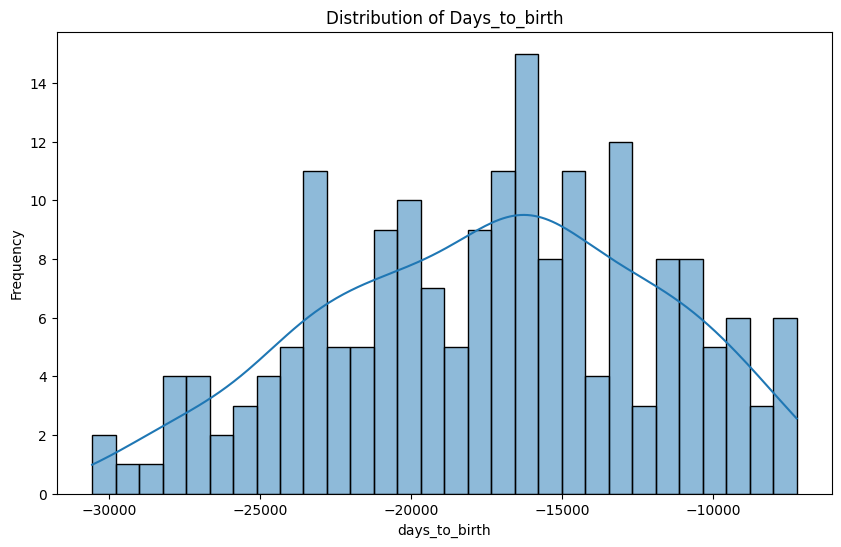

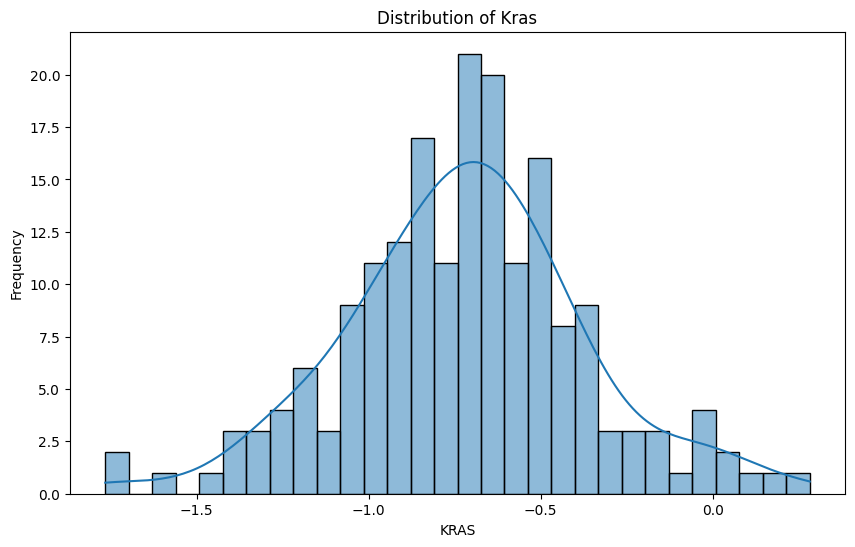

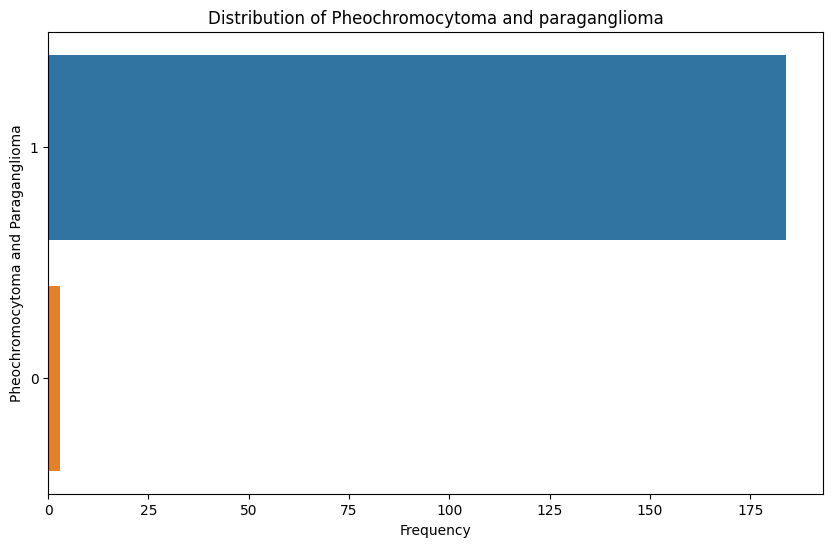

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(df, column, kind='numeric', **kwargs):
    """
    Plots the distribution of a column.
    
    Args:
    - df (DataFrame): The dataframe containing the data.
    - column (str): The column to plot.
    - kind (str): The type of plot ('numeric' or 'categorical').
    - **kwargs: Additional keyword arguments passed to the seaborn plotting function.
    """
    plt.figure(figsize=(10, 6))
    
    if kind == 'numeric':
        sns.histplot(df[column], kde=True, bins=30, **kwargs)
        plt.ylabel('Frequency')
    elif kind == 'categorical':
        sns.countplot(y=column, data=df, order=df[column].value_counts().index, **kwargs)
        plt.xlabel('Frequency')
        
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_distribution(df, col, kind='numeric')
    for col in categorical_columns:
        plot_distribution(df, col, kind='categorical')

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])


In [12]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,bcr_sample_barcode,ct_scan,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Pheochromocytoma and Paraganglioma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-P7-A5NX-01,TCGA-P7-A5NX-01,TCGA-P7-A5NX,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,78,TCGA-P7-A5NX-F62809,TCGA-P7-A5NX,TCGA-P7-A5NX-01A,YES,...,2.568483,-0.040233,-0.65589,-0.849877,-0.357986,1.155073,-0.148395,2.282067,1.055988,1
TCGA-P7-A5NY-01,TCGA-P7-A5NY-01,TCGA-P7-A5NY,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,21,TCGA-P7-A5NY-F62808,TCGA-P7-A5NY,NaN,YES,...,2.279883,-1.414733,-1.28139,-1.258577,-1.239386,-0.073227,-0.638095,1.798967,0.374388,1
TCGA-P7-A5NY-05,TCGA-P7-A5NY-05,TCGA-P7-A5NY,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,21,TCGA-P7-A5NY-F62808,TCGA-P7-A5NY,TCGA-P7-A5NY-05A,YES,...,-1.587117,0.247267,-1.28139,-0.708977,-0.048386,2.311673,-0.533195,0.122367,0.947788,1
TCGA-P8-A5KC-01,TCGA-P8-A5KC-01,TCGA-P8-A5KC,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,48,TCGA-P8-A5KC-F69550,TCGA-P8-A5KC,TCGA-P8-A5KC-01A,NaN,...,1.463783,0.349467,-1.28139,-0.917277,1.081514,3.745973,-1.170495,1.701167,0.413588,1
TCGA-P8-A5KC-11,TCGA-P8-A5KC-11,TCGA-P8-A5KC,TCGA Pheochromocytoma & Paraganglioma (PCPG),pheochromocytoma & paraganglioma,Paraganglia,48,TCGA-P8-A5KC-F69550,TCGA-P8-A5KC,NaN,NaN,...,4.272883,0.510467,-1.28139,-0.483577,0.335514,0.590473,0.358705,0.705667,1.535788,0


# 3. Do regression & Cross Validation

In [13]:
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

def shuffle_data(X, y):
    """Shuffle data and return shuffled datasets."""
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices], indices

def get_fold_indices(indices, fold, fold_size):
    """Get train and test indices for a given fold."""
    test_indices = indices[fold*fold_size : (fold+1)*fold_size]
    train_indices = np.setdiff1d(indices, test_indices)
    return train_indices, test_indices

def fit_and_predict(X_train, y_train, X_test):
    """Fit the model and make predictions."""
    var_select = VariableSelection()
    var_select.fit(X_train, y_train)
    return var_select.predict(X_test)

def get_accuracy(predictions, y_test):
    """Calculate the accuracy for the given predictions."""
    binary_predictions = (predictions > 0.5).astype(int)
    return np.mean(binary_predictions == y_test)

def cross_validation(X, y, k=5):
    """Implement k-fold cross-validation."""
    X_shuffled, y_shuffled, indices = shuffle_data(X, y)
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        train_indices, test_indices = get_fold_indices(indices, i, fold_size)
        
        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]
        
        predictions = fit_and_predict(X_train, y_train, X_test)
        accuracy = get_accuracy(predictions, y_test)
        
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))


TypeError: can only concatenate str (not "float") to str

# 4. Discussion

In [14]:
hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between RET and Pheochromocytoma and Paraganglioma when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the RET and Pheochromocytoma and Paraganglioma when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the RET and Pheochromocytoma and Paraganglioma when considering the influence of age.




In [16]:
def confirm_hypothesis(coefficient, p_value, variable_name, trait, condition, significance_level=0.05):
    """Determine if H0 or H1 is confirmed based on coefficient and p-value."""
    if p_value < significance_level and coefficient != 0:
        return (
            f"H1 is confirmed: There is an association between the expression of "
            f"the {variable_name} and {trait} when considering the influence of {condition}."
        )
    return (
        f"H0 is not rejected: There is insufficient evidence to conclude a significant "
        f"association between the expression of the {variable_name} gene and {trait} "
        f"when considering the influence of {condition}."
    )

# Assuming gene_results is a list of tuples with (variable_name, coefficient, p_value)
gene_results = [("RET", 0.1, 0.03), ("RET", -0.2, 0.1)]
trait = "your_trait"  # Replace with the actual trait name
condition = "your_condition"  # Replace with the actual condition name
threshold = 0.05

conclusions = [
    f"Variable: {variable_name}\n"
    f"Conclusion: {confirm_hypothesis(coefficient, p_value, variable_name, trait, condition, threshold)}\n\n"
    for variable_name, coefficient, p_value in gene_results
]

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n" + ''.join(conclusions)

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: RET
Conclusion: H1 is confirmed: There is an association between the expression of the RET and your_trait when considering the influence of your_condition.

Variable: RET
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the RET gene and your_trait when considering the influence of your_condition.


